<a href="https://colab.research.google.com/github/Decoding-Data-Science/nov25/blob/main/20_nov_logistic_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Python Code: Age, Income, and Purchase Prediction
# 1. SETUP: Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification # Tool for generating synthetic data

print("Step 1: Setting up Logistic Regression for the Purchase Prediction.")


Step 1: Setting up Logistic Regression for the Purchase Prediction.


In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,           # Represents two inputs: Age and Income [3]
    n_informative=2,        # Both features influence the outcome
    n_redundant=0,
    n_classes=2,            # Binary classification (Purchase/No Purchase) [2]
    random_state=42
)

# Rename features for better interpretability later
feature_names = ['Age (Feature 1)', 'Income (Feature 2)']

print(f"Sample Input (Age, Income): {X[:1]}")
print(f"Sample Answer (Purchase): {y[:1]}")

# 3. DATA ORGANIZATION: Splitting for Training and Testing
# We separate the "clues" (X) from the "answers" (Y) [1].
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. MODEL CREATION AND TRAINING
# We grab the Logistic Regression model from the scikit-learn toolbox [4].
model = LogisticRegression(random_state=42)

# This is the "magic moment" where all the learning happens using the .fit command.
# The model learns the pattern between Age/Income (X) and Purchase (Y) [1].
model.fit(X_train, y_train)

print("\nStep 4: Model training complete.")


# 5. TESTING/PREDICTION
# We use the predict command to ask the model for its best guess (0 or 1) on new data [1].
y_pred = model.predict(X_test)



Sample Input (Age, Income): [[-0.99910178 -0.66386   ]]
Sample Answer (Purchase): [1]

Step 4: Model training complete.


In [ ]:

# 6. EVALUATION
# We check how often the model's guess matches the actual answer (y_test).
accuracy = accuracy_score(y_test, y_pred)

print(f"\nStep 6: Model Evaluation Results")
print(f"Accuracy on Test Data: {accuracy:.4f}")


# 7. INTERPRETABILITY (Model Insights)
# Logistic regression has a "genuine superpower": interpretability. It's a "glass box" [5, 6].
print("\nStep 7: Model Insights (Interpretability):")

# Access the coefficients—the learned "weights" from the weighted sum [3].
# In binary classification, coefficients are in the first row of model.coef_.
coefficients = model.coef_

# Display the coefficients for Age and Income
for name, coef_value in zip(feature_names, coefficients[0]):
    print(f"{name} Coefficient: {coef_value:.4f}")

# The interpretation provides "real insights" [5]
print("\nInterpretation:")
print("A positive coefficient means that feature (Age or Income) increases the probability of a Purchase (1).")
print("A negative coefficient means that feature decreases the probability of a Purchase (1).")
print("This allows us to say in plain English how much each piece of information is tilting the scales [5].")


Step 6: Model Evaluation Results
Accuracy on Test Data: 0.8733

Step 7: Model Insights (Interpretability):
Age (Feature 1) Coefficient: -0.3306
Income (Feature 2) Coefficient: 2.0174

Interpretation:
A positive coefficient means that feature (Age or Income) increases the probability of a Purchase (1).
A negative coefficient means that feature decreases the probability of a Purchase (1).
This allows us to say in plain English how much each piece of information is tilting the scales [5].


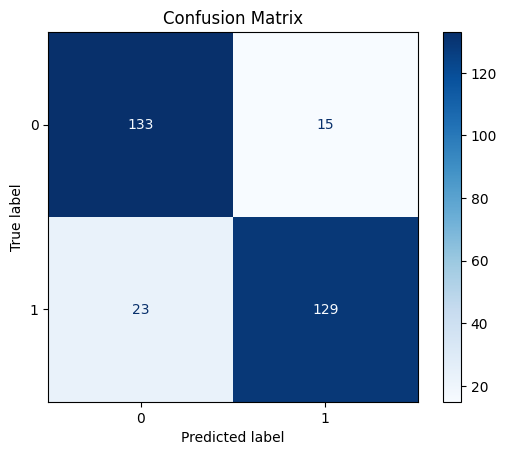


--- Understanding the Confusion Matrix ---
The confusion matrix is a table used to evaluate the performance of a classification model. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

Specifically, for a binary classification problem (like Purchase/No Purchase):
  - True Positives (TP): The model correctly predicted a positive class (e.g., predicted purchase, actual purchase).
  - True Negatives (TN): The model correctly predicted a negative class (e.g., predicted no purchase, actual no purchase).
  - False Positives (FP): The model incorrectly predicted a positive class (e.g., predicted purchase, actual no purchase). Also known as a Type I error.
  - False Negatives (FN): The model incorrectly predicted a negative class (e.g., predicted no purchase, actual purchase). Also known as a Type II error.

This matrix helps us see where the model is succeeding and where it is making mistakes.


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("\n--- Understanding the Confusion Matrix ---")
print("The confusion matrix is a table used to evaluate the performance of a classification model. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.")
print("\nSpecifically, for a binary classification problem (like Purchase/No Purchase):")
print("  - True Positives (TP): The model correctly predicted a positive class (e.g., predicted purchase, actual purchase).")
print("  - True Negatives (TN): The model correctly predicted a negative class (e.g., predicted no purchase, actual no purchase).")
print("  - False Positives (FP): The model incorrectly predicted a positive class (e.g., predicted purchase, actual no purchase). Also known as a Type I error.")
print("  - False Negatives (FN): The model incorrectly predicted a negative class (e.g., predicted no purchase, actual purchase). Also known as a Type II error.")
print("\nThis matrix helps us see where the model is succeeding and where it is making mistakes.")

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\n--- Understanding Precision and Recall ---")
print("Precision answers: Out of all the positive predictions our model made, how many were actually correct? It focuses on the quality of positive predictions.")
print("Recall answers: Out of all the actual positive cases, how many did our model correctly identify? It focuses on the completeness of positive predictions.")
print("Both precision and recall are important, and the balance between them often depends on the specific problem's requirements. For example, in medical diagnosis, recall might be prioritized to avoid missing any positive cases, while in spam detection, precision might be prioritized to avoid incorrectly flagging legitimate emails.")


Precision: 0.8958
Recall: 0.8487

--- Understanding Precision and Recall ---
Precision answers: Out of all the positive predictions our model made, how many were actually correct? It focuses on the quality of positive predictions.
Recall answers: Out of all the actual positive cases, how many did our model correctly identify? It focuses on the completeness of positive predictions.
Both precision and recall are important, and the balance between them often depends on the specific problem's requirements. For example, in medical diagnosis, recall might be prioritized to avoid missing any positive cases, while in spam detection, precision might be prioritized to avoid incorrectly flagging legitimate emails.
